In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv("house_price.csv")
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


#
# Normal Distribution

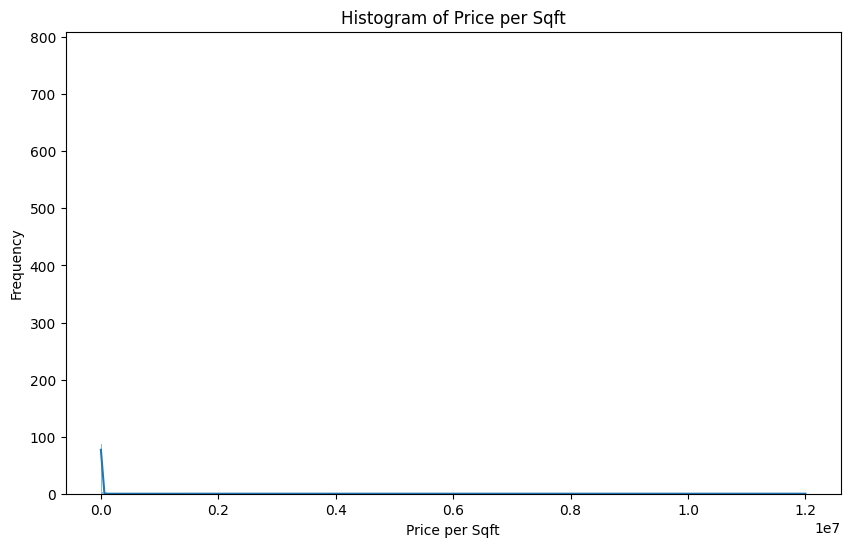

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

In [6]:
mean=data.price_per_sqft.mean()
mean

7920.336742424242

In [7]:
std=data.price_per_sqft.std()
std

106727.16032810867

In [8]:
lower_bound=mean-3*std
lower_bound

-312261.14424190175

In [9]:
upper_bound=mean+3*std
upper_bound

328101.8177267502

In [10]:
mean_function_df1=data[(data.price_per_sqft<lower_bound) | (data.price_per_sqft>upper_bound)]
mean_function_df1    #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [11]:
mean_function_df=data[(data.price_per_sqft>lower_bound) & (data.price_per_sqft<upper_bound)]
mean_function_df    #Removing outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

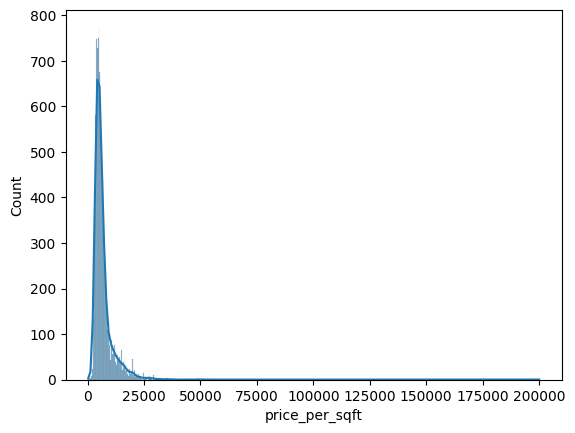

In [12]:
sns.histplot(data=mean_function_df,x=mean_function_df.price_per_sqft,kde=True)

<Axes: ylabel='price_per_sqft'>

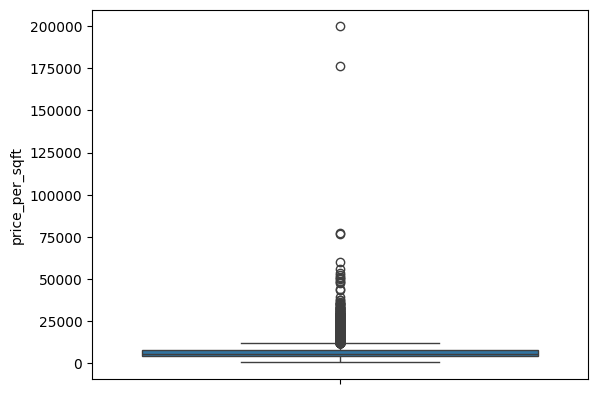

In [13]:
sns.boxplot(mean_function_df["price_per_sqft"])

# Percentile Method

In [14]:
lower_bound=data['price_per_sqft'].quantile(0.01)
lower_bound

2549.0

In [15]:
upper_bound=data['price_per_sqft'].quantile(0.99)
upper_bound

23674.45000000001

In [16]:
percentile_df1=data[(data['price_per_sqft']<lower_bound) | (data['price_per_sqft']>upper_bound)]
percentile_df1            #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [17]:
percentile_df=data[(data['price_per_sqft']>lower_bound) & (data['price_per_sqft']<upper_bound)]
percentile_df          #Removing Outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: ylabel='price_per_sqft'>

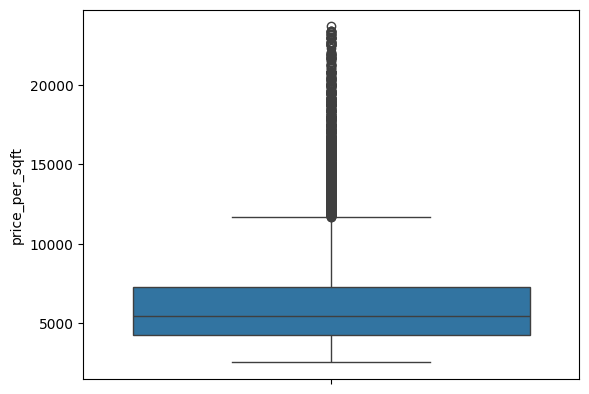

In [18]:
sns.boxplot(percentile_df["price_per_sqft"])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

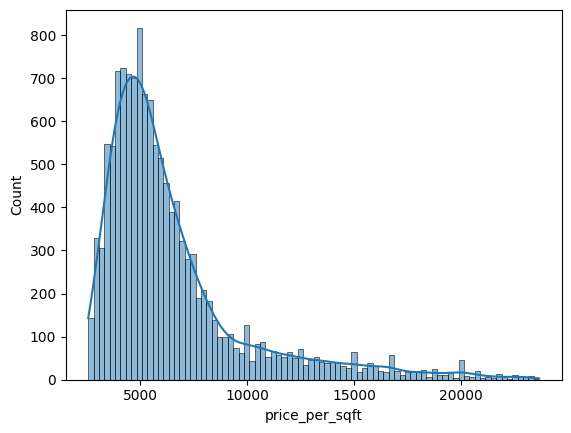

In [19]:
sns.histplot(data=percentile_df,x=percentile_df.price_per_sqft,kde=True)

# IQR Method

In [21]:
Q1=data['price_per_sqft'].quantile(0.25)
Q1

4267.0

In [22]:
Q3=data['price_per_sqft'].quantile(0.75)
Q3

7317.0

In [23]:
IQR=Q3-Q1
IQR

3050.0

In [24]:
lower_bound=Q1-1.5*IQR
lower_bound

-308.0

In [25]:
upper_bound=Q3+1.5*IQR
upper_bound

11892.0

In [26]:
IQR_df1=data[(data['price_per_sqft']<lower_bound) | (data['price_per_sqft']>upper_bound)]
IQR_df1                   #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [27]:
IQR_df=data[(data['price_per_sqft']>lower_bound) & (data['price_per_sqft']<upper_bound)]
IQR_df                               #removing outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: ylabel='price_per_sqft'>

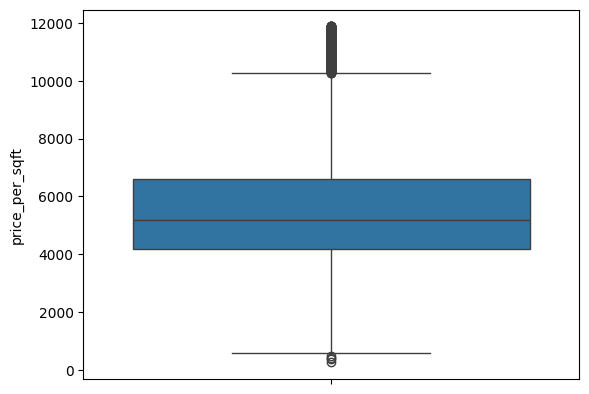

In [28]:
sns.boxplot(IQR_df["price_per_sqft"])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

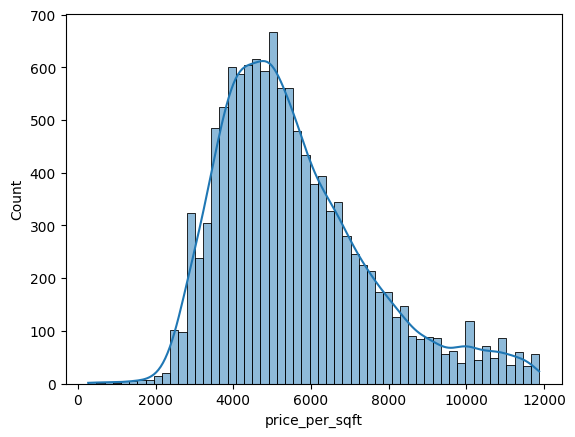

In [29]:
sns.histplot(data=IQR_df,x=IQR_df.price_per_sqft,kde=True)

# Zscore Method

In [39]:
data["z_scores"]= (data.price_per_sqft - mean) / std
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_scores
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [40]:
z_score_df1= data[(data.z_scores<-3) | (data.z_scores>3)]  
z_score_df1            #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_scores
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105


In [43]:
z_score_df=data[(data.z_scores>-3) & (data.z_scores<3)]
z_score_df                       #removing outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_scores
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


<Axes: ylabel='price_per_sqft'>

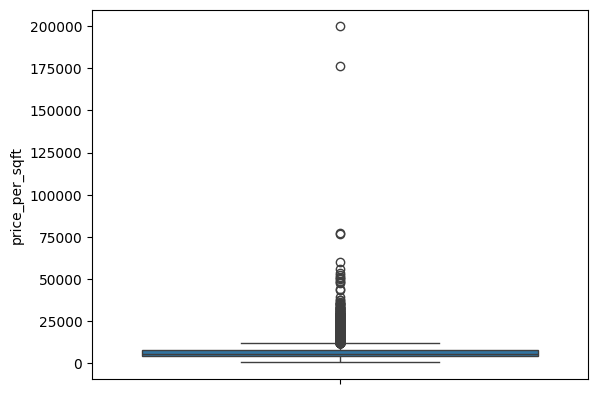

In [44]:
sns.boxplot(z_score_df["price_per_sqft"])

<Axes: xlabel='price_per_sqft', ylabel='Count'>

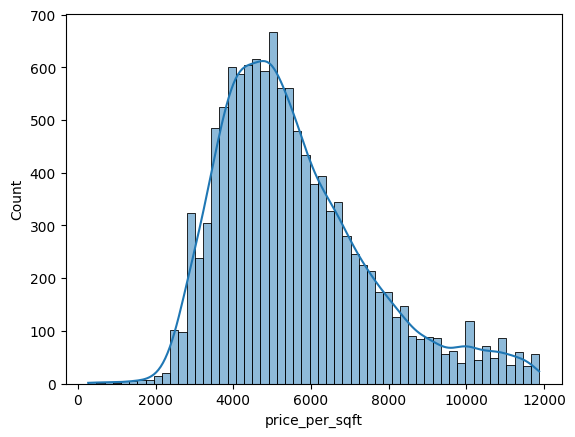

In [48]:
sns.histplot(data=z_score_df,x=IQR_df.price_per_sqft,kde=True)

# Correlation

<Axes: >

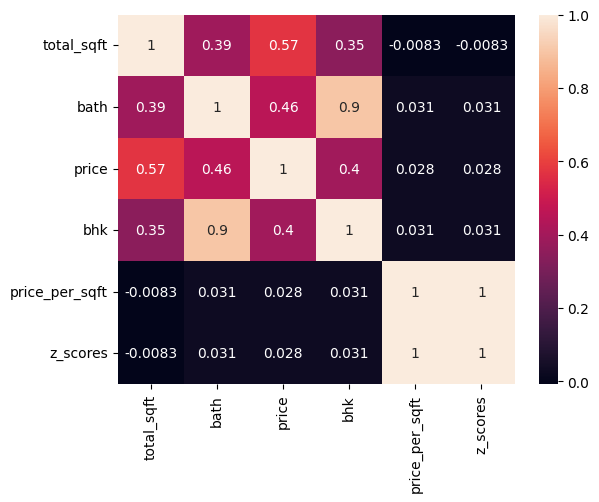

In [47]:

df=data.drop(columns=["location","size",],axis=1)
df
correlation= df.corr()
correlation





sns.heatmap(correlation, annot=True)

# Scatterplot

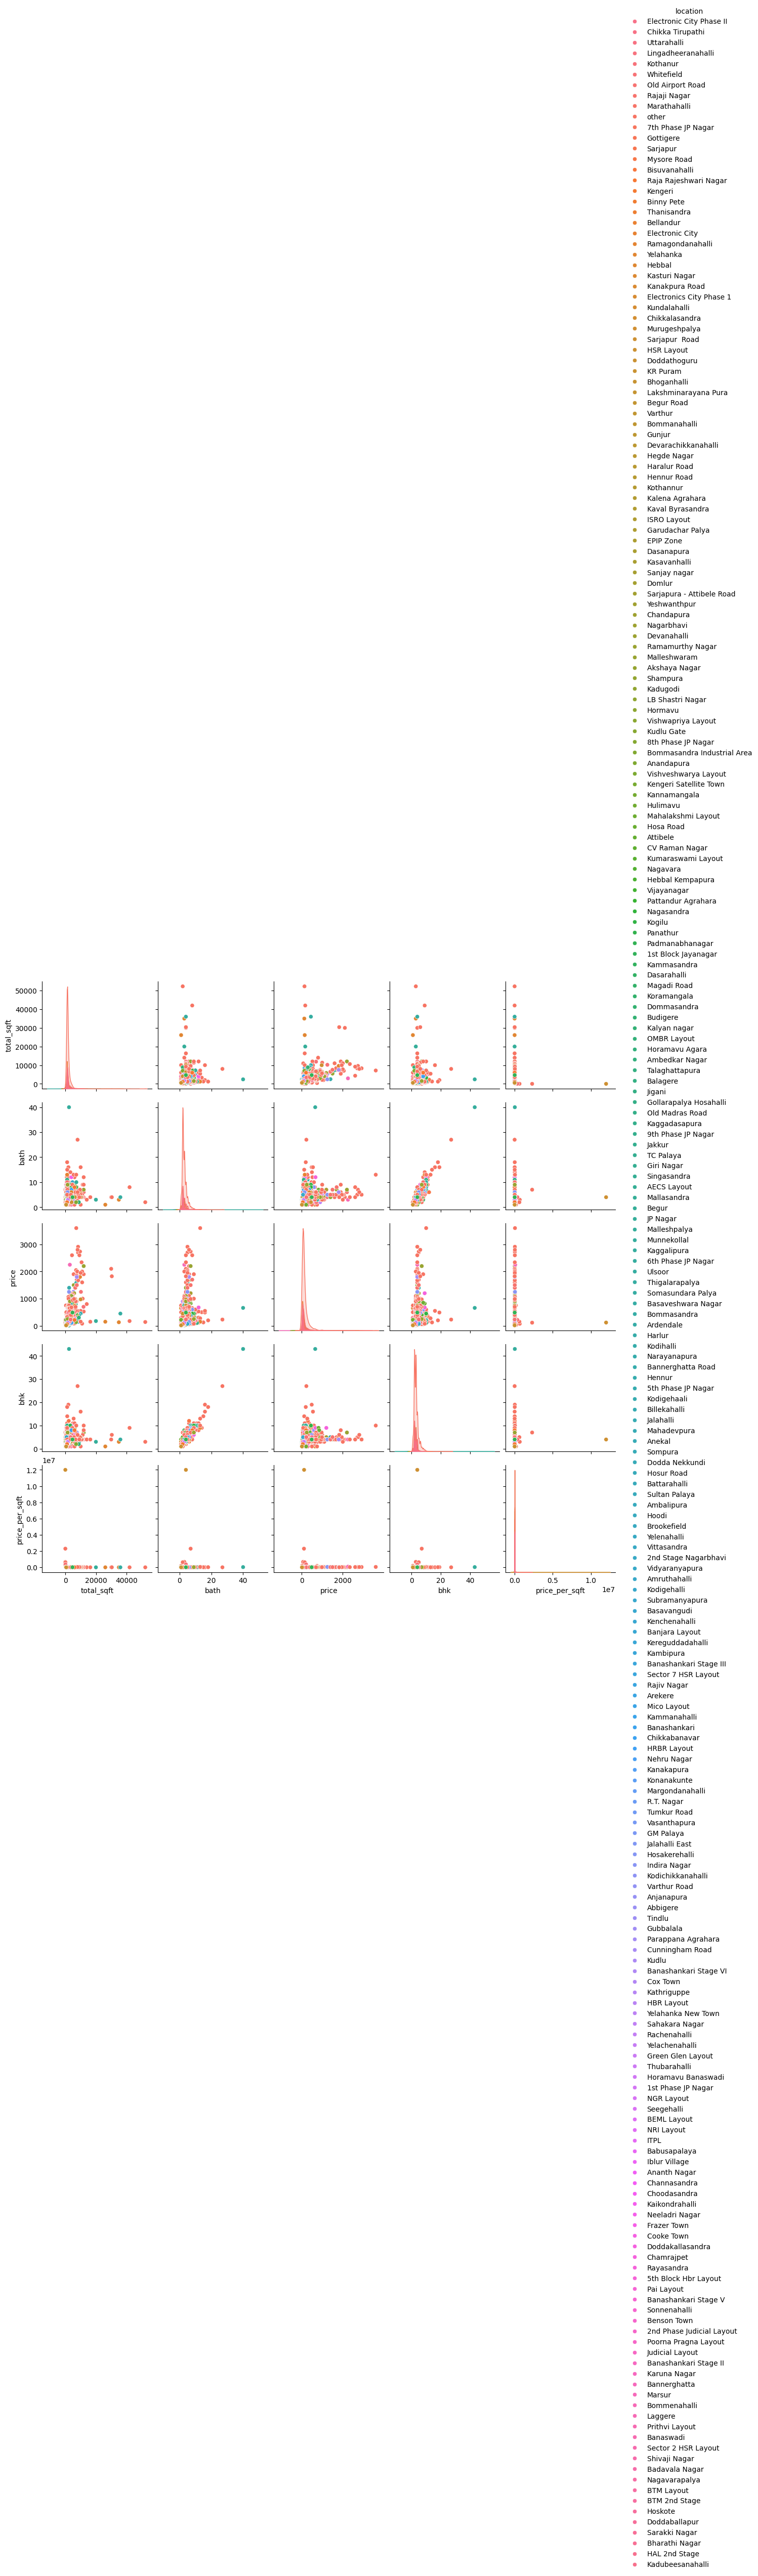

In [31]:

sns.pairplot(data, hue='location')
plt.show()

# Boxplot  

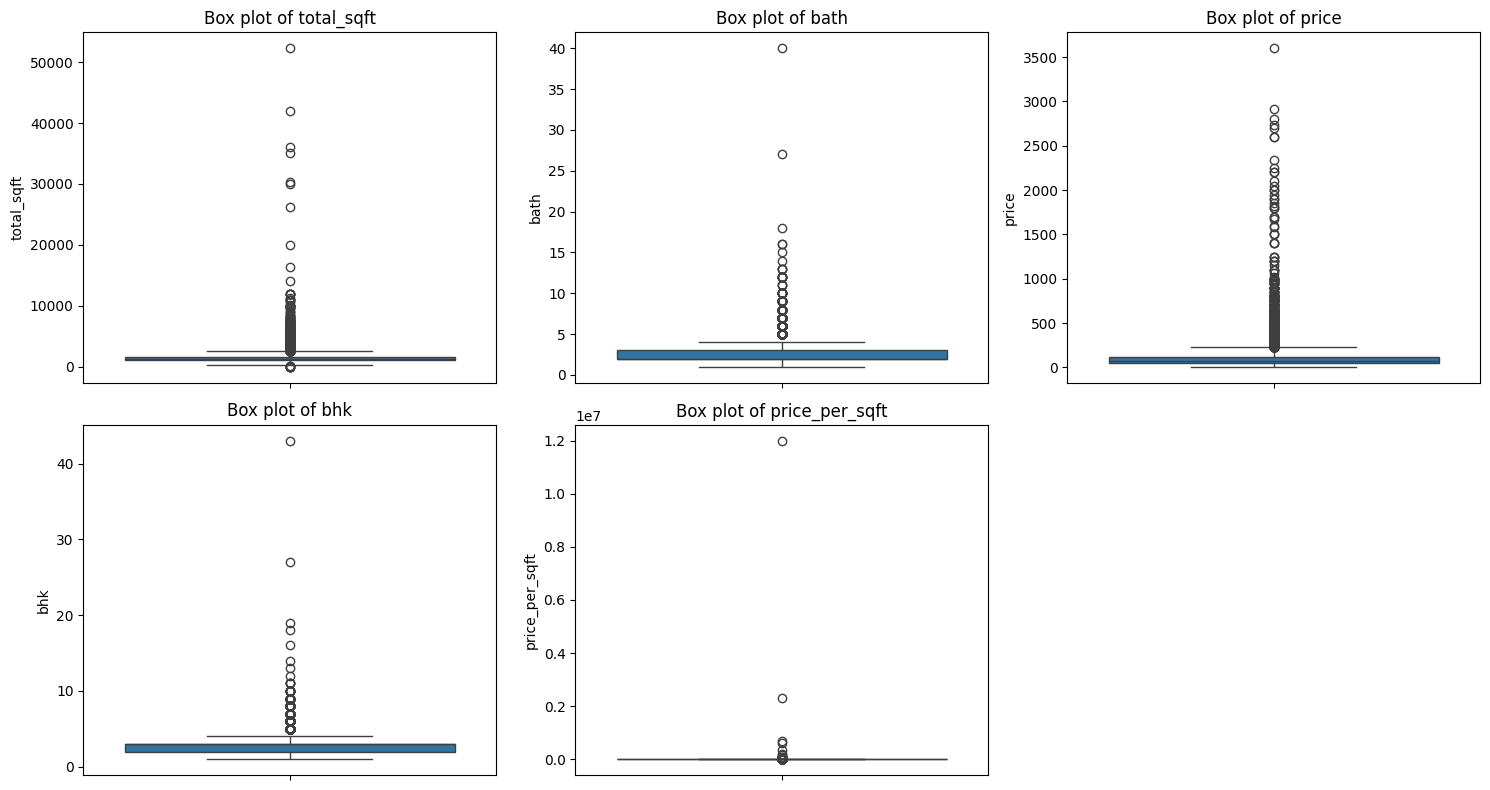

In [32]:
numerical_columns = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
plt.figure(figsize=(15, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()
